In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from src.plotting import *

In [2]:
gsam_eofs = load_gsam_eofs_on_era5_levels()
gsam_exp_var = load_gsam_era5_levels_explained_variance()
era5_eofs = load_era5_eofs()
era5_exp_var = load_era5_explained_variance()

In [4]:
print(gsam_exp_var.sel(mode=[1,2]).sum().item())
print(era5_exp_var.sel(mode=[1,2]).sum().item())

0.8555433350184554
0.7742649565493611


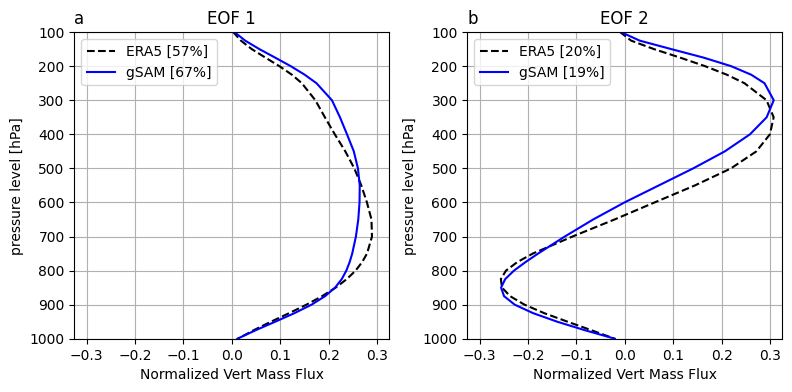

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(8,4))
era5_eofs.sel(mode=1).plot(ax=axs[0], y='level', color='k', linestyle='dashed', label=f'ERA5 [{100*era5_exp_var.sel(mode=1).item():.0f}%]')
era5_eofs.sel(mode=2).plot(ax=axs[1], y='level', color='k', linestyle='dashed', label=f'ERA5 [{100*era5_exp_var.sel(mode=2).item():.0f}%]')
gsam_eofs.sel(mode=1).plot(ax=axs[0], y='level', color='b', label=f'gSAM [{100*gsam_exp_var.sel(mode=1).item():.0f}%]')
gsam_eofs.sel(mode=2).plot(ax=axs[1], y='level', color='b', label=f'gSAM [{100*gsam_exp_var.sel(mode=2).item():.0f}%]')

axs[0].set_title('EOF 1')
axs[0].set_title('a', loc='left')
axs[1].set_title('EOF 2')
axs[1].set_title('b', loc='left')
for ax in axs.ravel():
    ax.legend(loc='upper left')
    ax.invert_yaxis()
    ax.set_ylim(1000, 100)
    ax.set_xlim(-0.325, 0.325)
    ax.grid()
    ax.set_xlabel('Normalized Vert Mass Flux')
plt.tight_layout(pad=1)
save_figure(fig, 'gsam_era5_massflux_eofs.pdf')

Text(0.5, 0, 'Normalized Vert Mass Flux')

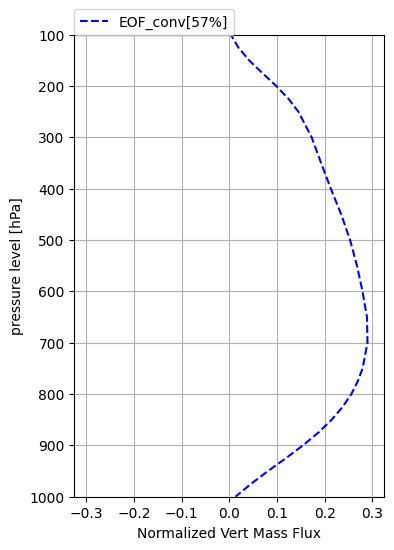

In [19]:
fig, ax = plt.subplots(figsize=(4,6))
era5_eofs.sel(mode=1).plot(ax=ax, y='level', color='b', linestyle='dashed', label=f'EOF_conv[{100*era5_exp_var.sel(mode=1).item():.0f}%]')
era5_eofs.sel(mode=2).plot(ax=ax, y='level', color='r', linestyle='dashed', label=f'EOF_strat [{100*era5_exp_var.sel(mode=2).item():.0f}%]')
ax.set_title(None)
ax.legend(loc=(0,1))
ax.invert_yaxis()
ax.set_ylim(1000, 100)
ax.set_xlim(-0.325, 0.325)
ax.grid()
ax.set_xlabel('Normalized Vert Mass Flux')
# plt.tight_layout(pad=1)
